In [1]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv('/content/drive/MyDrive/UFSC/Trabalhos/diabetes_prediction_dataset.csv')
dados_filtrados = data[data['smoking_history'] != 'No Info']
#dados_filtrados = dados_filtrados.drop(columns=['diabetes'], axis=1)
dados_filtrados = dados_filtrados.dropna(how='any')

In [5]:
from scipy import stats
z = np.abs(stats.zscore(dados_filtrados._get_numeric_data()))
dados_filtrados = dados_filtrados[(z < 3).all(axis=1)]
print(dados_filtrados.shape)

(53973, 9)


In [6]:
dados_filtrados['gender'].replace({'Male': 0, 'Female': 1, 'Other': 2},inplace = True)
dados_filtrados['smoking_history'].replace({'never': 0, 'former': 1, 'current': 2, 'not current': 3, 'ever': 4},inplace = True)
#dados_filtrados['gender'].value_counts()
#dados_filtrados['smoking_history'].value_counts()
dados_filtrados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53973 entries, 2 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               53973 non-null  int64  
 1   age                  53973 non-null  float64
 2   hypertension         53973 non-null  int64  
 3   heart_disease        53973 non-null  int64  
 4   smoking_history      53973 non-null  int64  
 5   bmi                  53973 non-null  float64
 6   HbA1c_level          53973 non-null  float64
 7   blood_glucose_level  53973 non-null  int64  
 8   diabetes             53973 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 4.1 MB


In [ ]:
#Padroniza os dados [0 a 1]
#from sklearn import preprocessing
#scaler = preprocessing.MinMaxScaler()
#scaler.fit(dados_filtrados)
#dados_filtrados = pd.DataFrame(scaler.transform(dados_filtrados), index=dados_filtrados.index, columns=dados_filtrados.columns)
#dados_filtrados.iloc[4:10]

In [7]:
from sklearn.feature_selection import SelectKBest, chi2
X = dados_filtrados.loc[:,dados_filtrados.columns!='diabetes']
y = dados_filtrados[['diabetes']]
selector = SelectKBest(chi2, k=3)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['age', 'bmi', 'blood_glucose_level'], dtype='object')


In [8]:
dados_filtrados['age'].value_counts()

80.00    2398
49.00    1015
47.00     997
46.00     997
38.00     996
         ... 
1.00        4
0.40        4
0.16        3
0.64        3
0.56        2
Name: age, Length: 101, dtype: int64

In [49]:
dados_filtrados = dados_filtrados[['age','HbA1c_level','blood_glucose_level','diabetes']]
X = dados_filtrados[['age']]
Y = dados_filtrados[['HbA1c_level']]

In [50]:
x = np.column_stack((X.values, Y.values))

In [51]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

In [52]:
x = StandardScaler().fit_transform(x) 
x

array([[-0.82359411,  0.21435942],
       [-0.40570182, -0.46902045],
       [-1.24148641,  1.09299069],
       ...,
       [ 1.16139429,  0.21435942],
       [-1.03254026, -1.4452774 ],
       [ 0.69126546,  1.09299069]])

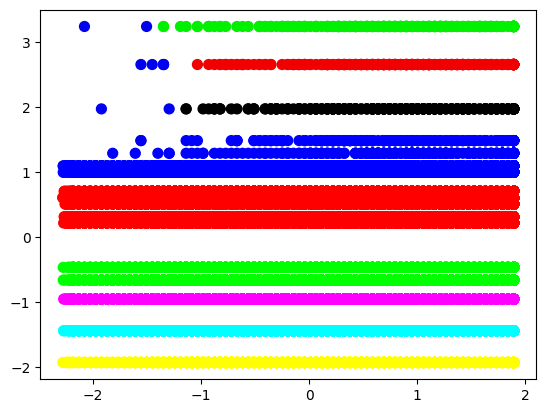

In [53]:
dbscan = DBSCAN(eps=0.2, min_samples=5) 

dbscan.fit(x)
labels = dbscan.labels_ 

colors = np.array(['#ff0000', '#00ff00', '#0000ff', '#ffff00', '#00ffff', '#ff00ff', '#000000', '#f00000', '#00f000', '#0000f0'])

plt.scatter(x[:, 0], x[:, 1], c=colors[labels], s=50)
plt.show()